<a href="https://colab.research.google.com/github/VasylDvorakDS/RECOGNISING-PICTURES-WITH-RNN/blob/master/RECOGNISING_PICTURES_WITH_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [2]:


# More imports
from tensorflow import keras
from keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from keras.models import Model
from keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [8]:


# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)



Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.3464 - accuracy: 0.8889 - val_loss: 0.1176 - val_accuracy: 0.9626
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1010 - accuracy: 0.9692 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0705 - accuracy: 0.9783 - val_loss: 0.0674 - val_accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0572 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0462 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0566 -

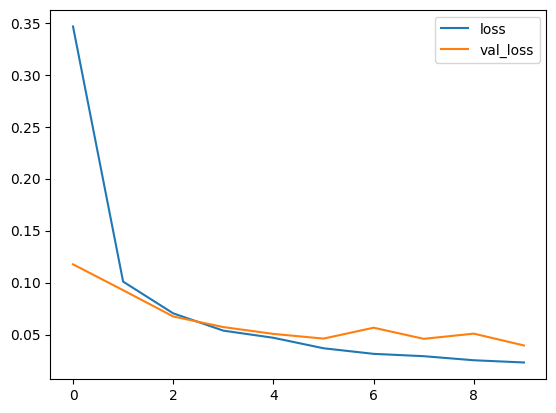

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

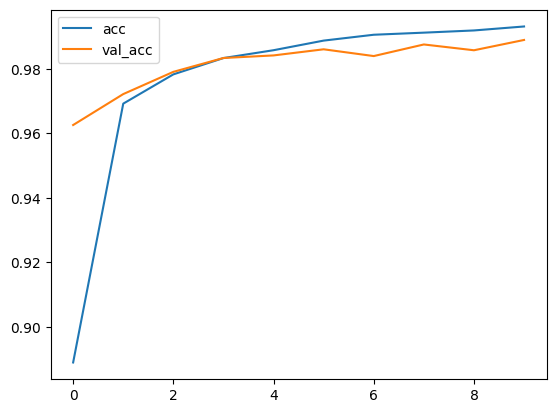

In [10]:


# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()



313/313 [==============================] - 7s 20ms/step
Confusion matrix, without normalization
[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1132    0    0    0    0    1    0    1    1]
 [   1    1 1018    2    1    0    1    7    1    0]
 [   0    0    1 1001    1    5    0    1    1    0]
 [   0    0    2    0  970    0    5    1    0    4]
 [   1    0    0    6    0  882    1    0    0    2]
 [   0    2    1    0    5    1  949    0    0    0]
 [   0    5    2    3    3    1    0 1009    0    5]
 [   0    0    2    1    1    3    1    1  960    5]
 [   0    0    1    0   10    0    0    5    0  993]]


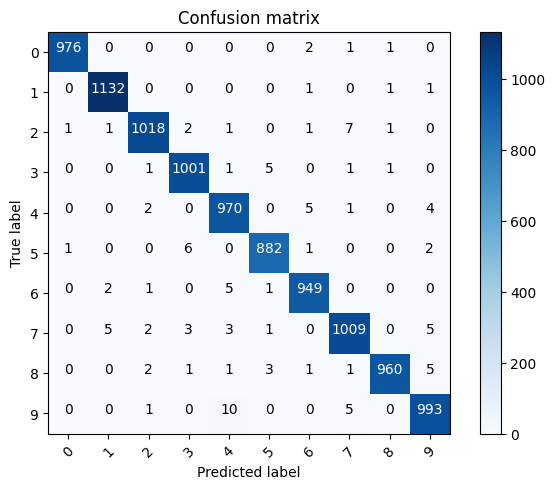

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

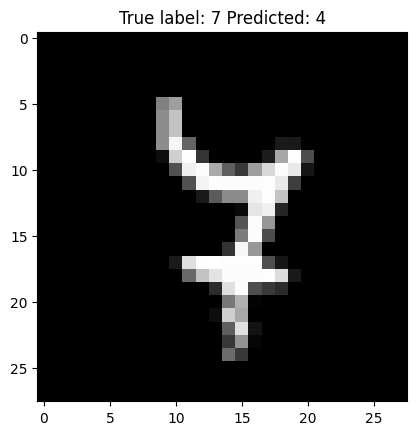

In [12]:


# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

